In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [58]:
df = pd.read_csv(r'StationaryOccluded.csv')
east = df['.UTM_easting']
north = df['.UTM_northing']
print(rsme(east))
print(rsme(north))
print(error_bounds('.UTM_easting'))
print(error_bounds('.UTM_northing'))
df[".UTM_easting"] = ((df[".UTM_easting"] - 327920))
df[".UTM_northing"] = ((df[".UTM_northing"] - 4689480)) 
print (df)

2.3948715203932336
1.5737622370725957
upper bound : 2.3027237501810305
mean: 327934.2661117763
lower bound : 5.462403611396439
None
upper bound : 3.4660953944548965
mean: 4689486.20671247
lower bound : 1.6206564819440246
None
                           time  .Header.seq  .Header.stamp.secs  \
0    2022/10/06/19:48:33.070122            0               85713   
1    2022/10/06/19:48:34.067414            0               85714   
2    2022/10/06/19:48:35.070960            0               85715   
3    2022/10/06/19:48:36.070438            0               85716   
4    2022/10/06/19:48:37.072227            0               85717   
..                          ...          ...                 ...   
625  2022/10/06/19:58:58.089205            0               86338   
626  2022/10/06/19:58:59.089367            0               86339   
627  2022/10/06/19:59:00.087150            0               86340   
628  2022/10/06/19:59:01.087856            0               86341   
629  2022/10/06/19:59:02.0

In [59]:
east = df['.UTM_easting']
north = df['.UTM_northing']
alt = df['.Altitude']
time = df['.Header.stamp.secs']
mean1 = np.mean(df['.UTM_easting'])
mean2 = np.mean(df['.UTM_northing'])
print(mean1)
print(mean2)

14.266111776268199
6.2067124702775525


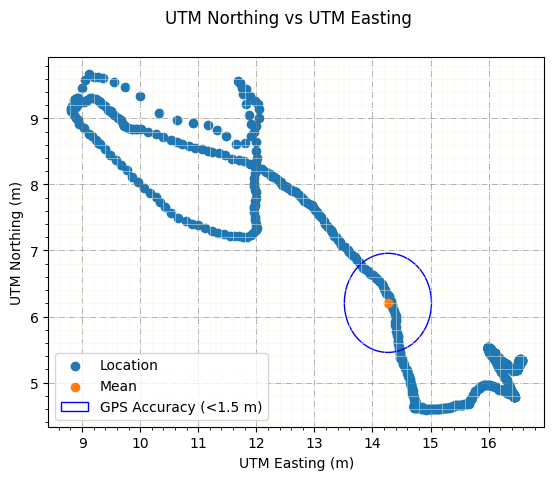

In [60]:
fig = plt.figure()
ax = plt.axes()
fig.suptitle('UTM Northing vs UTM Easting', fontsize=12)
circle2 = plt.Circle((14.266111776268199, 6.2067124702775525), 0.75, color='b', fill=False, label='GPS Accuracy (<1.5 m)')
one = ax.scatter(east, north, label='Location')
two = ax.scatter(mean1,mean2, label='Mean')
plt.legend(handles=[one, two, circle2], loc='lower left')
plt.xlabel('UTM Easting (m)', fontsize=10)
plt.ylabel('UTM Northing (m)', fontsize=10)
#major grid lines
plt.grid(visible=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=0.7)
#minor grid lines
plt.minorticks_on()
ax.add_patch(circle2)
plt.grid(visible=True, which='minor', color='beige', alpha=0.8, ls='-', lw=0.4)
plt.show()

In [61]:
def rsme (column_name):
 column = np.mean(column_name)
 column_rsme = np.sqrt(np.square(column_name - column).mean())
 return column_rsme

In [62]:
def error_bounds (column_name):
 column=df[column_name].tolist()
 mean = np.mean(column) 
 u = max(column) - np.mean(column)
 l = np.mean(column)  - min(column)
 print(f'upper bound : {u}')
 print(f'mean: {mean}')
 print(f'lower bound : {l}')

In [63]:
print(rsme(east))
print(rsme(north))

2.3948715203932336
1.5737622370725957


In [64]:
print(error_bounds('.UTM_easting'))
print(error_bounds('.UTM_northing'))

upper bound : 2.302723750203759
mean: 14.266111776268199
lower bound : 5.462403611373711
None
upper bound : 3.4660953945672466
mean: 6.2067124702775525
lower bound : 1.6206564818316744
None
